In [1]:
import os
import os.path as op
import sys

import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd

#from bluemath_tk.wrappers.swash.swash_wrapper import SwashModelWrapper
from IPython.display import HTML

from scripts.wrappers import SwashModelWrapper_shoaling

from scripts.bathymetry import linear_profile
from scripts.plots import plot_case_config

#### Inputs

In [2]:
templates_dir = '/workspaces/ONDAS_Swash/templates/templates_shoaling'
output_dir = '/workspaces/ONDAS_Swash/cases/shoaling'

In [3]:
Hs = 2.5
Tp = 10
Hs_L0 =  round((2 * np.pi * (Hs)) / (9.81 * (Tp ** 2)),4)  # Should be between 0.005 and 0.05
WL = 0.0

In [4]:
Hs_L0

0.016

In [5]:
h0 = -12  # offshore depth (m)
Ltotal = 1000  # beach heigh (m)
m = 8 / 300  # profile slope
Wfore = 400  # flume length before fore toe (m)

x_profile, depth_array = linear_profile(h0=h0, Ltotal=Ltotal, Wconst=Wfore, slope=m)

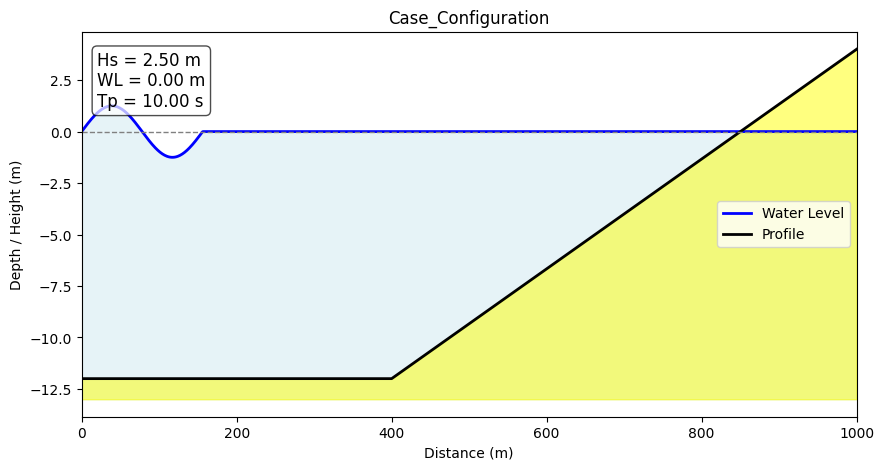

In [6]:
plot_case_config(x=x_profile, z=depth_array, wave_height=Hs, wave_period = Tp, WL=WL)

In [7]:
params = pd.DataFrame()
params['factor'] = np.arange(8,21,1) # Vector de 8 a 20 de 1 en 1

params['m'] = params['factor'] / 300
params['Ltotal'] = 1000
params['h0'] = -12
params['Wfore'] = 400

params['Hs'] = Hs
params['Hs_L0'] = Hs_L0 
params['WL'] = WL

In [8]:
metamodel_parameters = params.to_dict(orient='list')

fixed_parameters = {
    "dxinp": 1,  # bathymetry grid spacing  # Friction manning coefficient (m^-1/3 s)
    "comptime": 300,  # Simulation duration (s)
    "warmup": 300,  # Warmup duration (s)
    "n_nodes_per_wavelength": 60,  # number of nodes per wavelength
}

swash_model = SwashModelWrapper_shoaling(
    templates_dir=templates_dir,
    metamodel_parameters=metamodel_parameters,
    fixed_parameters=fixed_parameters,
    output_dir=output_dir,
    depth_array=-depth_array,
)

2025-10-26 13:10:42,590 - SwashModelWrapper_shoaling - WARNING - Parameter factor is not in the default_parameters
2025-10-26 13:10:42,591 - SwashModelWrapper_shoaling - WARNING - Parameter m is not in the default_parameters
2025-10-26 13:10:42,592 - SwashModelWrapper_shoaling - WARNING - Parameter Ltotal is not in the default_parameters
2025-10-26 13:10:42,593 - SwashModelWrapper_shoaling - WARNING - Parameter h0 is not in the default_parameters
2025-10-26 13:10:42,593 - SwashModelWrapper_shoaling - WARNING - Parameter Wfore is not in the default_parameters


In [9]:
swash_model.build_cases()

In [10]:
swash_model.run_cases(launcher='serial')